In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("data/db_one_team.csv")

In [3]:
df.drop(["team_team"], axis=1, inplace=True)

In [4]:
df = df[df.total_games_team>5]

In [5]:
target = 'team_score'

In [6]:
#df.opp_goals_suf_by_rank

In [7]:
df['goals_sum'] = df['team_goals_mean']+df['opp_goals_suf_mean']
df['goals_sum_l5'] = df['team_goals_mean_l5']+df['opp_goals_suf_mean_l5']

In [13]:
df['points_dif'] = df['team_game_points_rank_mean']-df['opp_game_points_rank_mean']
#df['points_dif_l5'] = df['team_game_points_rank_mean_l5']-df['opp_game_points_rank_mean_l5']

In [9]:
df['goals_sum_rank'] = df['team_goals_by_rank']*df['opp_goals_suf_by_rank']
#df['goals_sum_rank_l5'] = df['team_goals_by_rank_l5']*df['opp_goals_suf_by_rank_l5']

In [14]:
df.corr()

C:\Users\sergi\AppData\Local\Temp\ipykernel_45096\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,team_score,rank_team,rank_opp,team_goals_mean,team_goals_suf_mean,team_goals_mean_l5,team_goals_suf_mean_l5,opp_goals_suf_mean,opp_goals_suf_mean_l5,team_game_points_mean,...,opp_goals_suf_mean_weighted,opp_goals_suf_mean_l5_weighted,team_game_points_mean_weighted,team_game_points_mean_l5_weighted,opp_game_points_mean_weighted,opp_game_points_mean_l5_weighted,goals_sum,goals_sum_l5,points_dif,goals_sum_rank
team_score,1.000000,-0.212145,0.288627,0.259743,-0.184198,0.206923,-0.158900,0.310708,0.257905,0.243461,...,-0.485591,-0.459158,-0.486790,-0.461767,-0.397771,-0.370136,0.437107,0.336459,0.304914,0.400726
rank_team,-0.212145,1.000000,0.442271,-0.616601,0.673502,-0.404409,0.474998,0.254579,0.166475,-0.730527,...,0.398934,0.387457,0.455124,0.426181,0.502361,0.473250,-0.246656,-0.170412,-0.287641,-0.387904
rank_opp,0.288627,0.442271,1.000000,-0.210898,0.256338,-0.094201,0.158334,0.662999,0.484509,-0.248795,...,-0.539257,-0.507902,-0.517212,-0.487884,-0.464298,-0.435856,0.374782,0.284147,0.289537,0.230702
team_goals_mean,0.259743,-0.616601,-0.210898,1.000000,-0.572417,0.695432,-0.423132,-0.143885,-0.093638,0.845127,...,-0.286429,-0.279713,-0.355122,-0.338644,-0.388790,-0.361591,0.614473,0.433003,0.329258,0.364622
team_goals_suf_mean,-0.184198,0.673502,0.256338,-0.572417,1.000000,-0.381599,0.711532,0.252682,0.171453,-0.798464,...,0.305869,0.288987,0.306223,0.288505,0.369541,0.354117,-0.215950,-0.150361,-0.251224,-0.190487
team_goals_mean_l5,0.206923,-0.404409,-0.094201,0.695432,-0.381599,1.000000,-0.398097,-0.059365,-0.044832,0.587773,...,-0.228824,-0.219954,-0.276919,-0.275846,-0.293859,-0.275651,0.459770,0.687894,0.239513,0.286313
team_goals_suf_mean_l5,-0.158900,0.474998,0.158334,-0.423132,0.711532,-0.398097,1.000000,0.159197,0.147496,-0.583521,...,0.232669,0.219760,0.229555,0.211188,0.286390,0.266903,-0.181624,-0.179653,-0.188923,-0.140627
opp_goals_suf_mean,0.310708,0.254579,0.662999,-0.143885,0.252682,-0.059365,0.159197,1.000000,0.742643,-0.199671,...,-0.510419,-0.472568,-0.374361,-0.360459,-0.292198,-0.275429,0.692315,0.496791,0.242630,0.356425
opp_goals_suf_mean_l5,0.257905,0.166475,0.484509,-0.093638,0.171453,-0.044832,0.147496,0.742643,1.000000,-0.141156,...,-0.399551,-0.418413,-0.297065,-0.278319,-0.223525,-0.203619,0.523781,0.694242,0.186617,0.286317
team_game_points_mean,0.243461,-0.730527,-0.248795,0.845127,-0.798464,0.587773,-0.583521,-0.199671,-0.141156,1.000000,...,-0.337642,-0.325421,-0.409448,-0.384961,-0.448668,-0.420670,0.457068,0.320914,0.355930,0.318785


In [15]:
df_feats = df.drop([target], axis=1)

In [17]:
df_feats.columns

Index(['date', 'rank_team', 'rank_opp', 'team_goals_mean',
       'team_goals_suf_mean', 'team_goals_mean_l5', 'team_goals_suf_mean_l5',
       'opp_goals_suf_mean', 'opp_goals_suf_mean_l5', 'team_game_points_mean',
       'team_game_points_mean_l5', 'opp_game_points_mean',
       'opp_game_points_mean_l5', 'neutral', 'total_games_team',
       'team_goals_by_rank', 'team_goals_by_rank_l5', 'team_goals_suf_by_rank',
       'team_goals_suf_by_rank_l5', 'opp_goals_by_rank',
       'opp_goals_by_rank_l5', 'opp_goals_suf_by_rank',
       'opp_goals_suf_by_rank_l5', 'team_game_points_rank_mean',
       'team_game_points_rank_mean_l5', 'opp_game_points_rank_mean',
       'opp_game_points_rank_mean_l5', 'rank_dif', 'team_goals_mean_weighted',
       'team_goals_suf_mean_weighted', 'team_goals_mean_l5_weighted',
       'team_goals_suf_mean_l5_weighted', 'opp_goals_suf_mean_weighted',
       'opp_goals_suf_mean_l5_weighted', 'team_game_points_mean_weighted',
       'team_game_points_mean_l5_wei

In [18]:
feats = [a for a in df_feats.columns if "weighted" in a and ("_l5" not in a) and ('team_goals_suf' not in a)]

In [19]:
df_feats_full = pd.concat([df_feats.drop(['neutral'], axis=1), pd.get_dummies(df_feats.neutral, prefix="Neutral")], axis=1)

In [20]:
feats = feats + ['goals_sum', 'goals_sum_rank','points_dif', 'Neutral_False', 'Neutral_True']#['goals_sum_rank', 'goals_sum_rank_l5','points_dif', 'points_dif_l5', 'Neutral_False', 'Neutral_True']

In [35]:
feats

['team_goals_mean_weighted',
 'opp_goals_suf_mean_weighted',
 'team_game_points_mean_weighted',
 'opp_game_points_mean_weighted',
 'goals_sum',
 'goals_sum_rank',
 'points_dif',
 'Neutral_False',
 'Neutral_True']

In [22]:
X = df_feats_full[feats]
y = df[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

In [25]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [26]:
def residuals_plot(y_pred, y_test):
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    #plt.plot([min(y_test), min(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    plt.show()

In [27]:
rf_regressor = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['log2']  # Number of features to consider when looking for the best split
}

In [28]:
# Perform grid search with cross-validation using Mean Squared Error as the scoring function
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, np.ravel(y_train))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'max_features': ['log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [29]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 1.4204861927643846
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 300}
Best MSE Score: -1.479443123277937


In [30]:
#y_values = [a[0] for a in y_test.values]

In [31]:
y_pred = grid_search.predict(X_test.values)

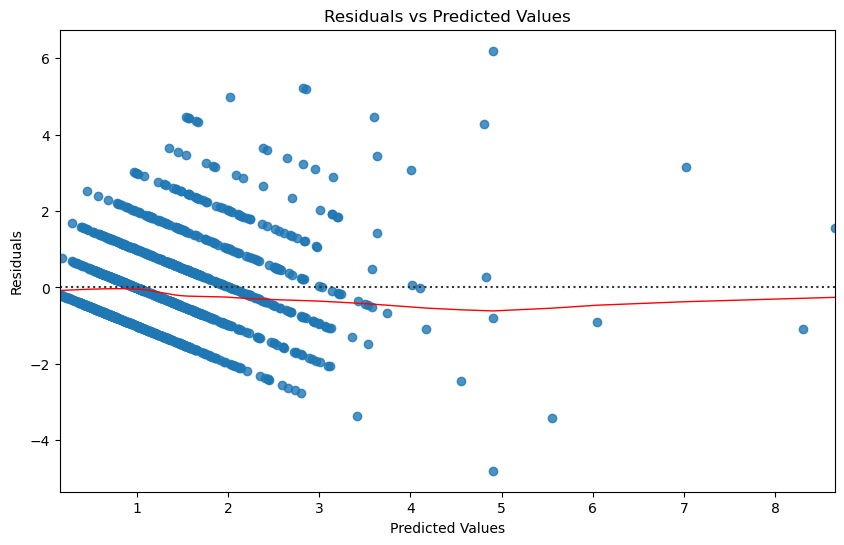

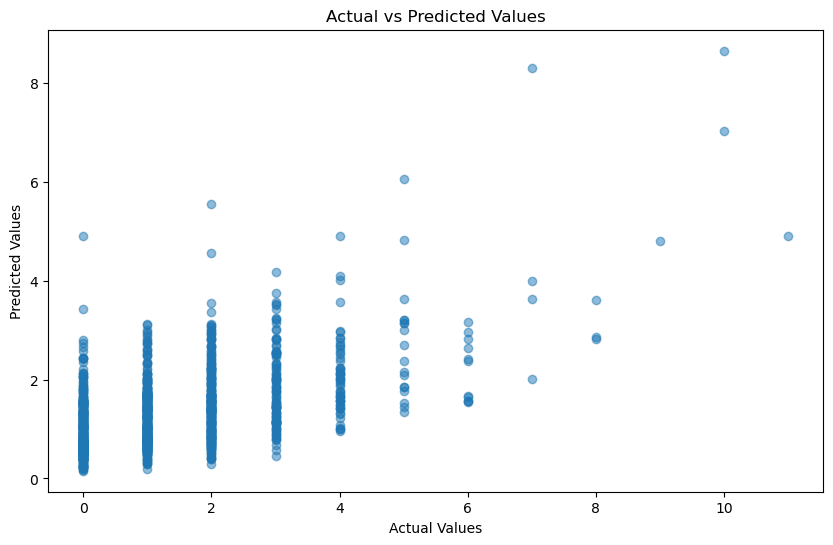

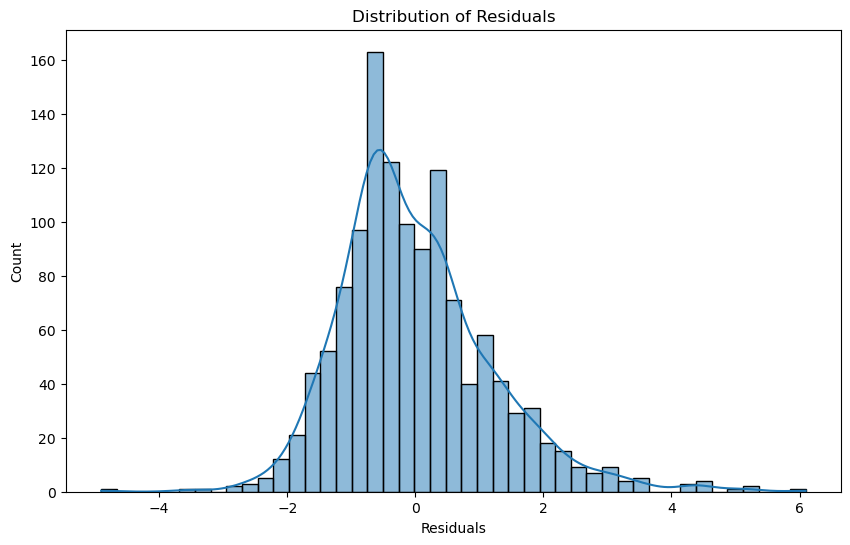

In [32]:
residuals_plot(y_pred, y_test.values.tolist())

In [33]:
import pickle
rf = grid_search.best_estimator_

In [34]:
with open('models/rf_one.pkl', 'wb') as f:
    pickle.dump(rf, f)